<a href="https://colab.research.google.com/github/reaz31/CourseProj/blob/main/Assn_2_LungCancer_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Assignment 1+2: EDA and Regression for ML Part 2
#Areej Reaz
import pickle 
import numpy as np
import pandas as pd
import sklearn 
with open ('/Users/areejreaz/Downloads/assign-1-radon-data.pickle', 'rb') as pickle_file:
    pickle_data = pickle.load(pickle_file)
pickle_df = pd.DataFrame(pickle_data)
pickle_df


,Code,State,County,Lung Cancer Mortality,Radon,Obesity,Age Over 65,Currently Smoke,Ever Smoke,Median HH Income,Mort Rank,Radon Rank
0,1001,AL,Autauga_County,97.0293,1.5,31.3,10.2,26.4,48.60,56.58,2523,1113.5
1,13103,GA,Effingham_County,94.4043,0.5,31.1,8.0,26.6,49.65,63.26,2409,270.5
2,13217,GA,Newton_County,91.8648,1.3,32.1,9.9,27.4,49.95,51.18,2281,974.5
3,13225,GA,Peach_County,93.6161,1.6,30.1,9.8,27.5,47.55,41.73,2366,1184.0
4,21077,KY,Gallatin_County,141.4099,0.6,30.9,10.3,27.9,54.60,47.68,2878,364.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2876,37135,NC,Orange_County,77.8595,2.0,22.2,8.4,15.4,41.80,61.57,1346,1410.5
2877,42029,PA,Chester_County,71.4891,9.9,22.1,11.7,17.6,43.10,90.56,932,2781.0
2878,49027,UT,Millard_County,27.1582,0.7,20.9,12.4,17.4,40.30,52.21,9,460.5
2879,49029,UT,Morgan_County,32.9497,3.7,21.2,8.7,12.2,31.50,81.36,23,2079.5


In [ ]:
# Examine the data for missing or invalid values.
#Decide what to do about missing or invalid data you observe:  Delete? Replace, Impute?
pickle_df.isnull().sum()
#1 Null item - should be deleted

Code                     0
State                    0
County                   0
Lung Cancer Mortality    0
Radon                    0
Obesity                  0
Age Over 65              0
Currently Smoke          0
Ever Smoke               0
Median HH Income         1
Mort Rank                0
Radon Rank               0
dtype: int64

In [ ]:
pd_df1 = pickle_df.dropna()
print(pd_df1)

       Code State            County  Lung Cancer Mortality  Radon  Obesity  \
0      1001    AL    Autauga_County                97.0293    1.5     31.3   
1     13103    GA  Effingham_County                94.4043    0.5     31.1   
2     13217    GA     Newton_County                91.8648    1.3     32.1   
3     13225    GA      Peach_County                93.6161    1.6     30.1   
4     21077    KY   Gallatin_County               141.4099    0.6     30.9   
...     ...   ...               ...                    ...    ...      ...   
2876  37135    NC     Orange_County                77.8595    2.0     22.2   
2877  42029    PA    Chester_County                71.4891    9.9     22.1   
2878  49027    UT    Millard_County                27.1582    0.7     20.9   
2879  49029    UT     Morgan_County                32.9497    3.7     21.2   
2880  49051    UT    Wasatch_County                30.8043    3.6     22.5   

      Age Over 65  Currently Smoke  Ever Smoke  Median HH Incom

In [ ]:
pd_df1.info()


#so the  Median HH Income - has one blank row and we can just drop this record so then there will be good data present.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 0 to 2880
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Code                   2880 non-null   int64  
 1   State                  2880 non-null   object 
 2   County                 2880 non-null   object 
 3   Lung Cancer Mortality  2880 non-null   float64
 4   Radon                  2880 non-null   float64
 5   Obesity                2880 non-null   float64
 6   Age Over 65            2880 non-null   float64
 7   Currently Smoke        2880 non-null   float64
 8   Ever Smoke             2880 non-null   float64
 9   Median HH Income       2880 non-null   float64
 10  Mort Rank              2880 non-null   int64  
 11  Radon Rank             2880 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 292.5+ KB


In [ ]:
#Describe the data by calculating descriptive statistics
print(pd_df1.describe())

#Based on the description below, it shows there are about 7,800,000 deaths on average per year due to lung cancer.
#Radon level seems to have a possible outlier, if Max is at 99.7 and average is about 3.08.
#On Average 29% of the population is obese. 


               Code  Lung Cancer Mortality        Radon      Obesity  \
count   2880.000000            2880.000000  2880.000000  2880.000000   
mean   29873.506250              78.121129     3.082007    29.039132   
std    14773.962255              17.650528     3.640678     3.723059   
min     1001.000000               6.761900     0.000000    11.500000   
25%    18170.500000              67.310000     1.000000    27.300000   
50%    29060.000000              79.154000     2.050000    29.200000   
75%    42049.500000              89.709625     4.000000    31.100000   
max    56043.000000             205.746400    99.700000    43.900000   

       Age Over 65  Currently Smoke   Ever Smoke  Median HH Income  \
count  2880.000000      2880.000000  2880.000000       2880.000000   
mean     14.818333        25.350347    49.929549         48.149885   
std       4.028053         4.801438     5.461456         11.929568   
min       3.000000         7.300000    25.650000         22.890000   
2

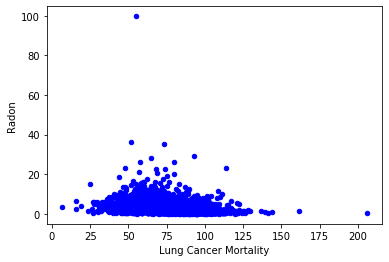

In [ ]:
#Graph Lung Cancer Mortality Rate vs. Radon
#X = ['Radon Rank']
#Y = ['Lung Cancer Mortality']

import matplotlib.pyplot as plt
import pandas as pd

pd_df1.plot(kind='scatter',x='Lung Cancer Mortality',y='Radon',color='blue')
plt.show()


#Lung Cancer Mortality:
#Mortality Rate (Deaths per 100,000 Person-Years)
#Radon:
#County Average Indoor Radon Level (1 decimal place)

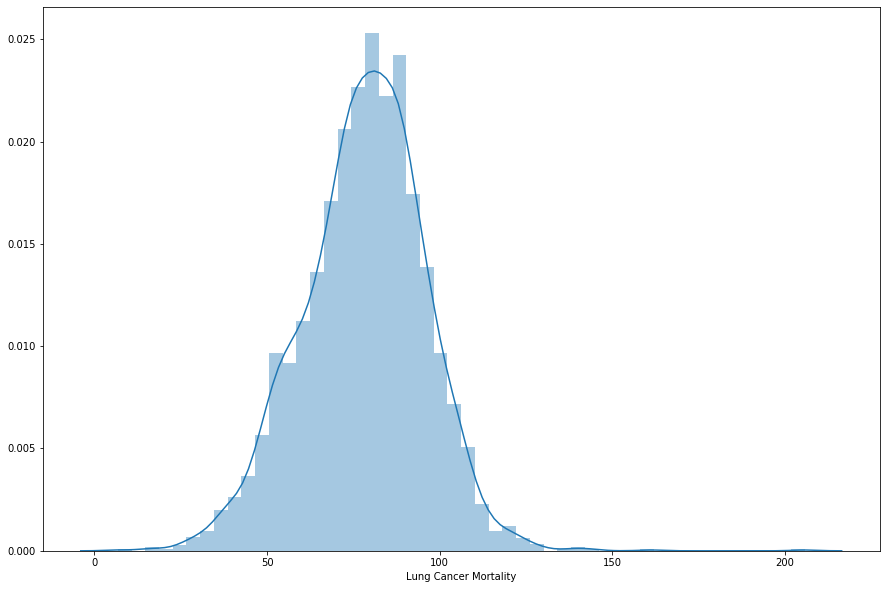

In [ ]:
# Density Plot and Histogram of all arrival delays
import seaborn as sns
import seaborn as seabornInstance 
#x = pd_df1['Lung Cancer Mortality']
#sns.distplot(x) 

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(pd_df1['Lung Cancer Mortality'])

In [ ]:
#Train a regression model that predicts Lung Cancer Mortality (LCM) using a cross-validation method.  
#K-fold cross-validation is preferred, but simple hold-out will suffice for this assignment.  
#Evaluate the performance of your model. 

#---------------------------------------------------------------------------------------------#


# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1


# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from math import sqrt  # for root mean-squared error calculation
import sklearn.linear_model 

#--------------------------------------------------------------------------------------------#

X = pd_df1['Radon'].values.reshape(-1,1)
y = pd_df1['Lung Cancer Mortality'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#testing the data between the LCM  vs the Radon levels
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,85.2203,81.140957
1,87.5139,81.428173
2,100.2406,82.289821
3,29.9109,81.140957
4,44.5470,75.253029
5,92.7481,77.837973
6,120.3381,80.997349
7,76.4395,76.114677
8,46.3092,68.503454
9,72.0148,79.417661


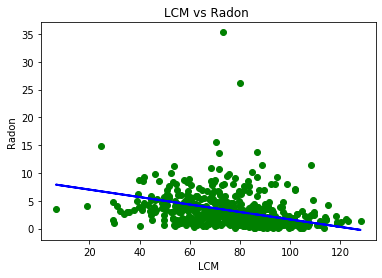

In [ ]:
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.xlabel('LCM')
plt.ylabel('Radon')
plt.title('LCM vs Radon ')
plt.show()

In [ ]:
# MSE is an appropriate performance metric.  
#The predictors, or "features" you use to predict LCM, is your choice to make, as long as you can justify it.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9025045539195655
Mean Squared Error: 8.49511057343533
Root Mean Squared Error: 2.9146372970637926


In [ ]:
#8.	 Train and validate a regression model that predicts LCM after standardizing, or rescaling, your features. 
    #Use a standardization or rescaling method of your choice.  Use K-fold or hold out validation. See: 
#https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling (Links to an external site.)
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py (Links to an external site.)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
import scipy
from pylab import rcParams
import seaborn as sns
from pandas import Series, DataFrame

import matplotlib.pyplot as plt 


xS = pd_df1['Radon'].values.reshape(-1,1)
yS = pd_df1['Lung Cancer Mortality'].values.reshape(-1,1)

XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, test_size=0.2, random_state=0)



In [ ]:
scaler = preprocessing.StandardScaler().fit(XS_train)
scaler
StandardScaler()

scaler.mean_



array([78.25052192])

In [ ]:
scaler.scale_

array([17.47954541])

In [ ]:
scaler.transform(XS_train)

array([[ 0.25068032],
       [ 0.36731379],
       [-1.70171599],
       ...,
       [ 1.43112292],
       [ 0.0664078 ],
       [-3.56386968]])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yS_test, yS_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yS_test, yS_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yS_test, yS_pred)))

Mean Absolute Error: 165.41525229995972
Mean Squared Error: 28940.638649087246
Root Mean Squared Error: 170.11948344938992


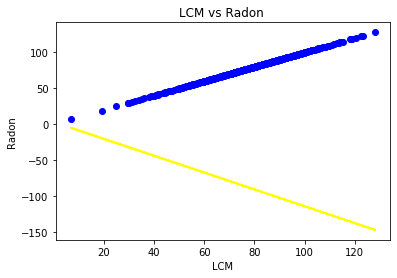

In [ ]:
plt.scatter(XS_test, yS_test,  color='blue')
plt.plot(XS_test, yS_pred, color='yellow', linewidth=2)
plt.xlabel('LCM')
plt.ylabel('Radon')
plt.title('LCM vs Radon ')
plt.show()

#Based on the graph below, it seems the standard scalar method I am using is perhaps not working.